In [173]:
import re
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [174]:
reddit_data = pd.read_csv("/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/data/Reddit_ScienceParenting_ForAnalysis_2022.09.02.csv")

In [175]:
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID
0,0_88469_126_t1_h8zyf5g,I need actual numbers and problems that can oc...,I don't have any studies to share but if you h...,2021-08-15 00:13:31,0_88469_126_t3_p4mbnp,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,1
1,0_88469_126_t1_h8zztfs,I need actual numbers and problems that can oc...,"To piggyback on this, it may also be easier to...",2021-08-15 00:29:07,0_88469_126_t3_p4mbnp,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,2
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3
3,0_88469_126_t1_h90calb,Best age for learning a second language?,Best age to start is 0 months. ~~By 10 months ...,2021-08-15 03:10:48,0_88469_126_t3_p4op8d,https://www.reddit.com/r/ScienceBasedParenting...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,0,0,4
4,0_88469_126_t1_h90tu70,Impact of the COVID-19 Pandemic on Early Child...,My son is 2 and has no issues whatsoever. Mayb...,2021-08-15 07:13:42,0_88469_126_t3_p3zzag,https://www.reddit.com/r/ScienceBasedParenting...,NaN,0,0,5


In [176]:
reddit_data.columns

Index(['id', 'title', 'content', 'date', 'parent', 'url', 'links url',
       'number_of_upvotes', 'number_of_replies', 'StudyID'],
      dtype='object')

In [177]:
reddit_data = reddit_data[reddit_data['parent']=="0"]

In [178]:
reddit_data.shape

(711, 10)

Replacing the null values in 'content' column with space

In [179]:
reddit_data['content'] = reddit_data['content'].fillna(' ')

In [180]:
reddit_data['title_content'] = reddit_data['title'] + reddit_data['content']

Removing all URLs from the title_content 

In [181]:
def remove_urls(text):
    s2 = re.sub('http[s]?://\S+', '', text)
    return s2
reddit_data['title_content'] = reddit_data['title_content'].apply(lambda x: remove_urls(x))


<>:2: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \S
/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_76920/4122027546.py:2: DeprecationWarning: invalid escape sequence \S
  s2 = re.sub('http[s]?://\S+', '', text)


In [182]:
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f..."
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...


Lowering the text

In [183]:
reddit_data['title_content_lower']= reddit_data['title_content'].apply(lambda x: x.lower())

Removing emojis from the text

In [184]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [185]:
reddit_data['title_content_lower'] = reddit_data['title_content_lower'].apply(lambda x: remove_emoji(x))
reddit_data.head(3)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...


Tokenization

The text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [186]:
from nltk import word_tokenize

In [187]:
reddit_data['title_content_tokenized'] = reddit_data['title_content_lower'].apply(lambda x: word_tokenize(x))
reddit_data.head(3)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov..."


Stop word removal

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [188]:
#Stopwords present in the spaCy library
spacy_Stopwords = ['really', 'sometimes', 'go', 'since', 'whither', 'they', 'its', 'them', 'well', 'meanwhile', 'seems', 'and', 'latterly', 'regarding', 'somehow', 'sixty', 'whole', 'anyway', 'else', 'few', "'m", 'beside', 'to', 'namely', 'someone', 'see', 'moreover', 'wherein', 'for', 'former', 'bottom', 'it', 'next', 'six', 'along', 'once', 'might', 'whenever', 'below', 'another', 'yourself', 'each', 'just', 'ourselves', 'everyone', 'any', 'across', 'get', 'that', 'eight', 'we', 'which', 'therefore', 'may', "'s", 'keep', 'among', 'give', 'such', 'are', 'indeed', 'everywhere', 'same', 'herself', 'yourselves', 'alone', 'were', 'was', 'take', 'seem', 'say', 'why', 'show', 'between', 'during', 'elsewhere', 'or', 'though', 'forty', 'made', 'used', 'others', 'whereafter', 'formerly', 'several', 'via', 'does', 'please', 'three', 'also', 'fifty', 'afterwards', "'s", 'noone', 'do', 'perhaps', 'further', 'i', 'beforehand', 'myself', 'empty', "'ll", 'yet', 'thereby', 'been', 'both', 'never', 'put', 'without', 'him', 'a', 'nothing', 'thereafter', 'make', 'then', 'whom', 'must', 'sometime', 'against', 'through', 'being', 'four', 'back', 'become', 'our', 'himself', 'because', 'anything', "'re", 'nor', 'therein', 'due', 'until', 'own', 'ca', 'most', 'now', 'while', 'of', 'only', 'am', 'itself', 'too', "'m", 'nobody', 'if', 'one', 'whereas', 'twelve', 'together', 'can', 'who', 'even', 'be', 'she', 'besides', 'herein', 'off', "'d", 'last', 'no', 'whereupon', 'the', "'m", 'thru', 'out', 'hereupon', 'by', 'us', 'already', 'became', 'here', 'hers', 'onto', 'beyond', 'down', 'enough', 'did', 'some', 'over', 'serious', 'quite', 'move', 'around', 'nowhere', 'amongst', 'but', 'so', 'wherever', 'twenty', 'often', 'part', 'again', 'where', 're', 'within', 'at', "n't", 'yours', 'front', 'unless', 'could', 'anyone', 'third', 'whatever', 'doing', "'d", 'nevertheless', 'before', 'rather', 'fifteen', 'her', 'me', 'thereupon', 'mostly', 'throughout', 'hence', "'re", 'mine', 'ten', 'hundred', 'nine', 'call', 'when', 'about', 'will', 'whereby', 'this', 'upon', 'you', 'should', 'always', 'themselves', 'not', 'has', 'behind', 'on', 'anywhere', 'side', 'their', 'hereby', 'latter', 'after', "'ve", 'none', 'these', 'name', "n't", 'every', 'although', "'s", 'however', 'he', 'becoming', 'how', 'whose', 'still', 'hereafter', 'whether', 'towards', 'more', 'everything', 'whoever', 'seemed', 'cannot', 'up', 'otherwise', 'in', 'would', 'under', 'done', 'thence', 'whence', 'seeming', 'either', 'other', 'with', 'into', 'amount', 'five', 'much', 'except', 'his', 'thus', "'ll", 'what', 'almost', 'becomes', 'least', 'ever', 'above', 'is', 'first', 'there', 'somewhere', 'top', 'than', 'have', 'toward', 'per', 'all', 'ours', 'full', "'d", 'anyhow', 'as', "'ll", 'many', 'various', 'your', 'had', 'eleven', 'from', 'something', 'less', 'those', 'using', 'an', 'two', 'my', 'very', 'neither']

In [189]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [190]:
total_stopwords = list(set(stopwords + spacy_Stopwords))
len(total_stopwords)

368

In [191]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in total_stopwords]
    return output

In [192]:
reddit_data['title_content_noSW'] = reddit_data['title_content_tokenized'].apply(lambda x: remove_stopwords(x))
reddit_data.head(3)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty..."


Punctuation Removal

In [64]:
#library that contains punctuation
import string
string.punctuation
string.punctuation + ".'`"

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~.\'`'

In [195]:
#defining the function to remove punctuation
def remove_punctuation(text):
    #punctuationfree= "".join([i if i not in string.punctuation else ' ' for i in text])
    punctuationfree= [i for i in text if i not in string.punctuation]
    return punctuationfree
#storing the puntuation free text
reddit_data['clean_title_content'] = reddit_data['title_content_noSW'].apply(lambda x:remove_punctuation(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin..."


Stemming

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.

In [66]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [67]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
reddit_data['clean_title_content_stemmed']=reddit_data['clean_title_content'].apply(lambda x: stemming(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content,clean_title_content_stemmed
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ...","[best, age, learn, second, languag, know, rese..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr...","[zofran, pregnant, evid, base, data, zofran, r..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty...","[17-year, studi, children, associ, poverti, sm..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]","[10, kid, adhd, outgrow, studi, find]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin...","[studi, show, differ, rapidli, process, sensor..."


Lemmatization

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [68]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soumyadeepray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
reddit_data['clean_title_content_lemmatized']=reddit_data['clean_title_content_stemmed'].apply(lambda x:lemmatizer(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content,clean_title_content_stemmed,clean_title_content_lemmatized
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ...","[best, age, learn, second, languag, know, rese...","[best, age, learn, second, languag, know, rese..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr...","[zofran, pregnant, evid, base, data, zofran, r...","[zofran, pregnant, evid, base, data, zofran, r..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty...","[17-year, studi, children, associ, poverti, sm...","[17-year, studi, child, associ, poverti, small..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]","[10, kid, adhd, outgrow, studi, find]","[10, kid, adhd, outgrow, studi, find]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin...","[studi, show, differ, rapidli, process, sensor...","[studi, show, differ, rapidli, process, sensor..."


WordCloud Generation

In [71]:
from wordcloud import WordCloud
def wordcloud(x, color):
    plt.figure(figsize=(14, 10))
    wordcloud = WordCloud(width = 1000, height = 500,background_color = color).generate(" ".join(x))
    plt.imshow(wordcloud)
    plt.axis("off")
    return wordcloud

Building WordCloud after Stemming and Lemmatization

In [72]:
words_list = []
for i in reddit_data['clean_title_content_lemmatized']:
    for word in i:
        words_list.append(word)

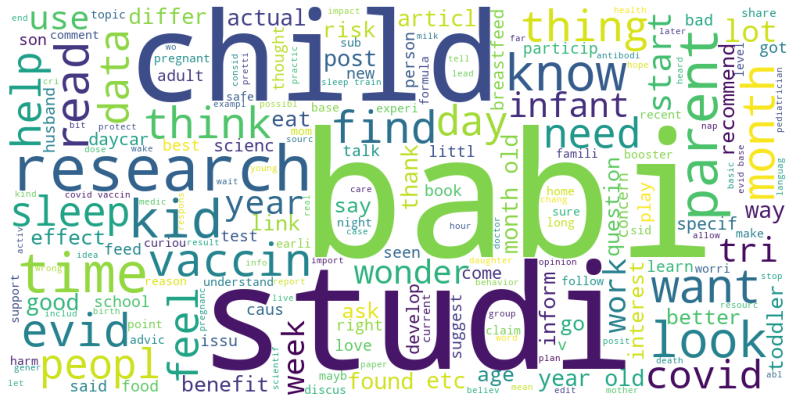

In [73]:
words = ' '.join(words_list)
all_words = words.split()
wordcloud(all_words, 'white')

Building WordCloud before Stemming and Lemmatization

In [74]:
words_list_1 = []
for i in reddit_data['clean_title_content']:
    for word in i:
        words_list_1.append(word)

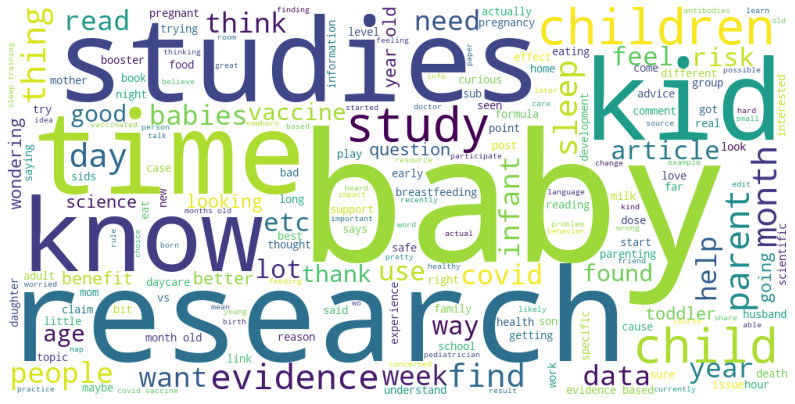

In [75]:
words_1 = ' '.join(words_list_1)
all_words_1 = words_1.split()
wordcloud(all_words_1, 'white')

Generating n-grams

In [79]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [91]:
words_1 = words_1.replace('austinthought.org/rnr','')
words_1 = words_1.replace('`','')
words_1 = words_1.replace("'",'')
words_1 = words_1.replace('  ',' ')

## BIGRAM ANALYSIS

In [80]:
word_count = defaultdict(int)
for word in generate_N_grams(words_1,2):
    word_count[word] += 1

In [81]:
df_word_count = pd.DataFrame(sorted(word_count.items(),key=lambda x:x[1],reverse=True))

Deleting an unnecessary string of punctuations

In [82]:
df_word_count.drop(df_word_count[(df_word_count[0] == "'' ``") | (df_word_count[0] == "`` ''")].index, inplace=True)

In [83]:
word=df_word_count[0][:100]
count=df_word_count[1][:100]

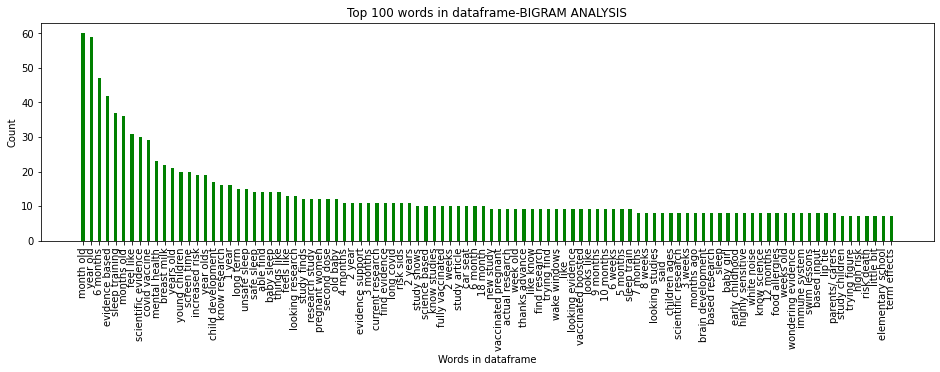

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(word,count, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 100 words in dataframe-BIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("bigram_analysis.png")
plt.show()

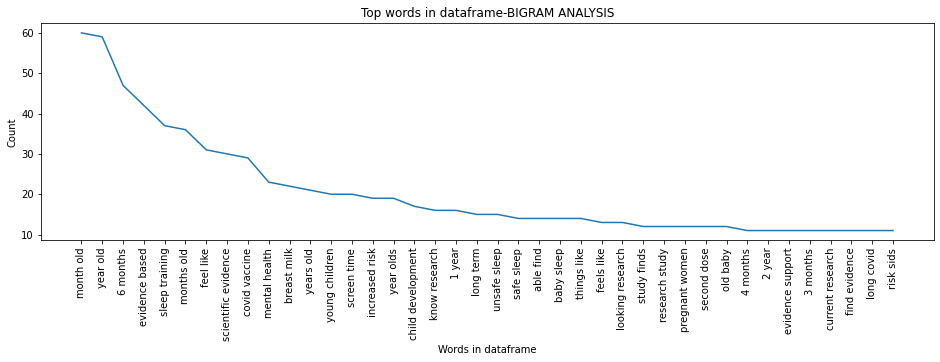

In [85]:
plt.figure(1,figsize=(16,4))
sns.lineplot( x = word[:40],
             y = count[:40])
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-BIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("bigram_analysis_lineplot.png")
plt.show()

__TRIGRAM ANALYSIS__

In [86]:
word_count = defaultdict(int)
for word in generate_N_grams(words_1,3):
    word_count[word] += 1

In [87]:
df_word_count = pd.DataFrame(sorted(word_count.items(),key=lambda x:x[1],reverse=True))

In [88]:
word=df_word_count[0][:100]
count=df_word_count[1][:100]

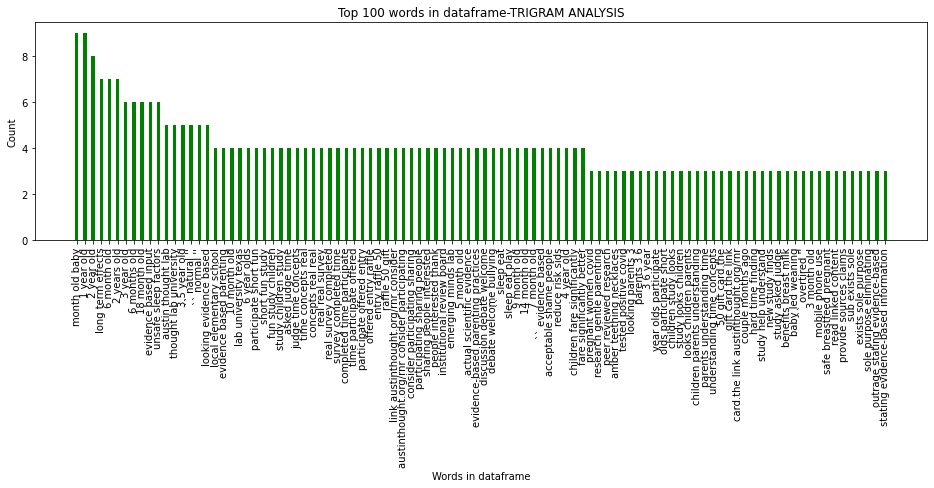

In [89]:
plt.figure(1,figsize=(16,4))
plt.bar(word,count, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 100 words in dataframe-TRIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("trigram_analysis.png")
plt.show()

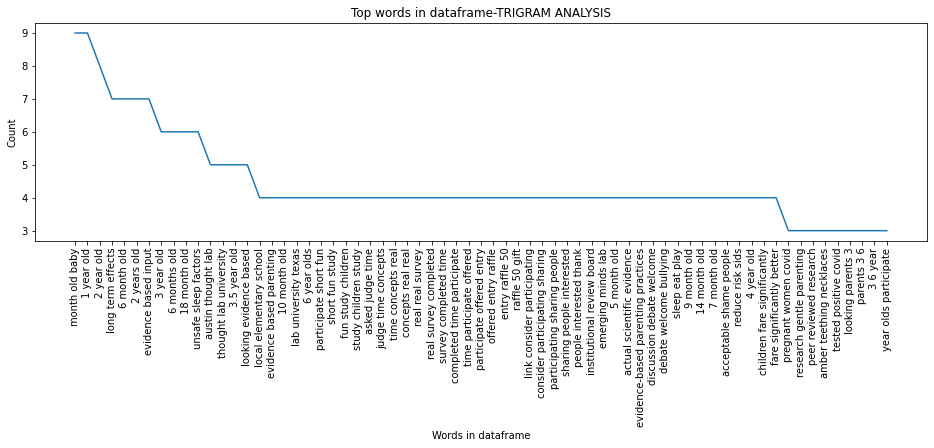

In [264]:
plt.figure(1,figsize=(16,4))
sns.lineplot( x = word[:67],
             y = count[:67])
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-TRIGRAM ANALYSIS")
plt.xticks(rotation = 90)
plt.savefig("trigram_analysis_lineplot.png")
plt.show()

# _TOPIC MODELLING_

___Gensim = “Generate Similar”___ is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as −

Building document or word vectors

__Corpora__

Performing topic identification

Performing document comparison (retrieving semantically similar documents)

Analysing plain-text documents for semantic structure

In [208]:
#defining the function to remove punctuation
def remove_punct(text):
    punctuationfree= [i for i in text if i not in ["\'\'","``"]]
    return punctuationfree
#storing the puntuation free text
reddit_data['clean_title_content'] = reddit_data['clean_title_content'].apply(lambda x:remove_punct(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin..."


In [209]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(reddit_data['clean_title_content'])


___BAG OF WORDS___

id2word.doc2bow method assigns a value throughout the corpus to each word, and the frequency for which that word is seen within the document.

In [210]:
corpus = [id2word.doc2bow(text) for text in reddit_data['clean_title_content']]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


Next we will incorporate the filter_extremes function, set to remove tokens with a frequency of no values less than 3 characters, and seen more than 95% of total corpus.

In [211]:
id2word.filter_extremes(no_below=3, no_above=0.95)
corpus = [id2word.doc2bow(text) for text in reddit_data['clean_title_content']]

___LATENT DIRICHLET ALLOCATION (LDA)___ is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a topic model.

Initially we are building a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [212]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"baby" + 0.011*"research" + 0.010*"like" + 0.009*"find" + '
  '0.008*"time" + 0.007*"children" + 0.007*"covid" + 0.007*"evidence" + '
  '0.006*"studies" + 0.006*"people"'),
 (1,
  '0.010*"baby" + 0.010*"research" + 0.009*"like" + 0.009*"time" + '
  '0.009*"kids" + 0.008*"sleep" + 0.007*"covid" + 0.007*"studies" + '
  '0.006*"evidence" + 0.006*"eat"'),
 (2,
  '0.013*"evidence" + 0.012*"like" + 0.012*"baby" + 0.010*"time" + '
  '0.009*"research" + 0.008*"old" + 0.007*"know" + 0.006*"year" + '
  '0.006*"child" + 0.006*"think"'),
 (3,
  '0.013*"baby" + 0.009*"study" + 0.008*"child" + 0.008*"studies" + '
  '0.007*"research" + 0.007*"old" + 0.006*"health" + 0.006*"sleep" + '
  '0.006*"find" + 0.006*"want"'),
 (4,
  '0.011*"evidence" + 0.010*"old" + 0.009*"know" + 0.009*"studies" + '
  '0.008*"children" + 0.008*"baby" + 0.008*"time" + 0.007*"child" + '
  '0.007*"like" + 0.007*"read"'),
 (5,
  '0.015*"study" + 0.011*"children" + 0.010*"child" + 0.010*"covid" + '
  '0.009*"evidenc

In [213]:
len(doc_lda)

711

___Analyzing LDA model results___

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and

2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [214]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [215]:

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = '/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/results/ldavis_prepared_'+str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

/opt/homebrew/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the im

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.011099  0.009788       1        1  16.103255
4      0.013717 -0.005079       2        1  13.686305
0     -0.000792 -0.034878       3        1  11.666842
6      0.024892 -0.002016       4        1  10.777428
2      0.012875 -0.024897       5        1  10.221626
1      0.039959 -0.014984       6        1   9.800489
9      0.003698  0.023483       7        1   9.406701
5     -0.070406 -0.025030       8        1   6.825222
8      0.006126  0.026596       9        1   6.221460
3     -0.018969  0.047018      10        1   5.290672, topic_info=          Term        Freq       Total Category  logprob  loglift
63       study  231.000000  231.000000  Default  30.0000  30.0000
279      sleep  236.000000  236.000000  Default  29.0000  29.0000
1428   daycare   77.000000   77.000000  Default  28.0000  28.0000
211       baby  404.000000  404.000000  Default  27.0000  27.0000
125      child  198.000000  198.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
716          6    6.473700   87.295865  Topic10  -5.7082   0.3377
67        kids    7.450419  192.891075  Topic10  -5.5677  -0.3146
40    evidence    7.359576  283.070377  Topic10  -5.5800  -0.7105
383      covid    6.754523  178.315216  Topic10  -5.6658  -0.3341
736     better    6.069947   89.041445  Topic10  -5.7726   0.2535

[749 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1289      7  0.453357  10-25
1289      9  0.226679  10-25
236       1  0.168249      2
236       2  0.177597      2
236       3  0.121514      2
...     ...       ...    ...
899      10  0.058916  years
812       2  0.532559     yr
812       6  0.266280     yr
931       1  0.449631      –
931       8  0.299754      –

[2690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 1, 7, 3, 2, 10, 6, 9, 4])

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)

In [216]:
from IPython.display import IFrame
IFrame(src=LDAvis_data_filepath, width=700, height=600)

The interactive visualization comes in the form of a plot (left) and a horizontal bar chart (right).

Each bubble in the plot represents a topic. The size of the bubble represents the proportion of reviews that contain the topic, with a larger bubble corresponding to a higher proportion. The distance between the bubbles represents the similarity between the topics; the shorter the distance, the more similar the topics.

The bars in the bar chart represent the term frequency for each of the words. The blue bars show the overall term frequency in the collection of documents, whereas the red bars show the term frequency for the selected topic.

In [218]:
from gensim.models import CoherenceModel
coherence_values = []
coherencemodel = CoherenceModel(model=lda_model,corpus=corpus, dictionary=id2word, coherence='c_v')
coherence_values.append(coherencemodel.get_coherence())

ValueError: ("'texts' should be provided for %s coherence.", 'c_v')